# Simulate dropout smearing

Try to simulate a complex function f: R->R. Let a model train on it. Then shift the function up and use dropout. How good will it adapt? Will there be smearing?

Import libraries

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from torch.nn.functional import relu
from torch import nn
import torch
from torch.utils.data import DataLoader,TensorDataset

# Define helper functions

In [101]:
def plot_loss_hist(train_loss_hist, eval_loss_hist):
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss_hist, label='Training Loss', color='blue')
    plt.plot(eval_loss_hist, label='Validation Loss', color='orange')

    # Add labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

In [102]:

def plot_functions(x,layer,n_func=None,):
    if n_func is None:
        n_func = layer.bias.size(0)

    weights = layer.weight.detach().numpy()
    bias = layer.bias.detach().numpy()
    y_acc = torch.zeros_like(torch.from_numpy(x))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title('Functions')
    

    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Accumulated functions')
    

    for i in range(n_func):
        f = lambda x: relu(torch.from_numpy(weights[i,] * x + bias[i]))
        y = f(x)
        ax1.plot(x,y, label=f'func_{i}')

        y_acc += y
        ax2.plot(x,y_acc, label=f'acc_func_{i}')
    
    ax1.legend()
    ax1.grid(True)
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    # Show the combined figure
    plt.show()

In [103]:
from statistics import mean
def create_dataloaders(x, y, batch_size=16, train_frac=0.6, plot_data=False):
    train_mask = np.zeros([x.shape[0]],dtype=bool)
    train_mask[:int(train_frac*x.shape[0])] = 1
    np.random.shuffle(train_mask)
    test_mask = ~train_mask

    if plot_data:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

        # Plot the first line plot on the first subplot
        ax1.plot(x[train_mask], y[train_mask], label='train', color='blue')
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_title('Training data')
        ax1.legend()
        ax1.axvline(min(x[train_mask]), 0.1, 0.9, color='k', linestyle='--')
        ax1.text(min(x[train_mask]), mean(y[train_mask]), f'x_min = {min(x[train_mask])}', ha='center', va='center',rotation='vertical', bbox={'facecolor':'white', 'pad':5})

        ax1.axvline(max(x[train_mask]), 0.1, 0.9, color='k', linestyle='--')
        ax1.text(max(x[train_mask]), mean(y[train_mask]), f'x_max = {max(x[train_mask])}', ha='center', va='center',rotation='vertical', bbox={'facecolor':'white', 'pad':5})


        # Plot the second line plot on the second subplot
        ax2.plot(x[test_mask], y[test_mask], label='test', color='green')
        ax2.set_xlabel('x')
        ax2.set_ylabel('y')
        ax2.set_title('Test data')
        ax2.legend()
        ax2.axvline(min(x[test_mask]), 0.1, 0.9, color='k', linestyle='--')
        ax2.text(min(x[test_mask]), mean(y[test_mask]), f'x_min = {min(x[test_mask])}', ha='center', va='center',rotation='vertical', bbox={'facecolor':'white', 'pad':5})
        ax2.axvline(max(x[test_mask]), 0.1, 0.9, color='k', linestyle='--')
        ax2.text(max(x[test_mask]), mean(y[test_mask]), f'x_max = {max(x[test_mask])}', ha='center', va='center',rotation='vertical', bbox={'facecolor':'white', 'pad':5})

        # Adjust spacing between subplots
        plt.tight_layout()

        # Show the combined figure
        plt.show()

    train_set = TensorDataset(torch.from_numpy(x[train_mask]), torch.from_numpy(y[train_mask]))
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=False)

    test_set = TensorDataset(torch.from_numpy(x[test_mask]), torch.from_numpy(y[test_mask]))
    test_dataloader= DataLoader(test_set, batch_size=batch_size, shuffle=False)

    dataloaders = {'train':train_loader,
                'eval':test_dataloader}
    return dataloaders


In [4]:
es = early_stopping_callback()
print(id(es))
es = early_stopping_callback()


2904868674672
2904692678128


In [3]:
import torch
a = torch.Tensor([1,2,3])
a


tensor([1., 2., 3.])

In [4]:
torch.mean(a)

tensor(2.)

In [3]:
import time
class early_stopping_callback:
  def __init__(self,min_delta=0,patience=1):
    self.min_delta=min_delta
    self.patience=patience
    self.counter=0
    self.lowest_loss=np.inf
  def check_early_stopping(self,eval_loss):
    delta =  self.lowest_loss - eval_loss
    if delta >= self.min_delta:
      self.lowest_loss = eval_loss
      self.counter = 0
    else:
      self.counter += 1
      if self.counter >= self.patience:
        return True
    return False
  
    
def train_model(model, dataloaders, loss_fn, optimizer, num_epochs=5, verbose = 0):
    since = time.time()
    if verbose > 0:
      modulo_coeff = 10
    else:
      modulo_coeff = 100

    patience = 10
    es_callback = early_stopping_callback(min_delta=0,patience=patience)

    train_loss_hist = []
    eval_loss_hist = []

    for epoch in range(num_epochs):
        if epoch % modulo_coeff == 0:
          print('Epoch {}/{}'.format(epoch, num_epochs - 1))

        ############ train phase ############
        phase = 'train'
        model.train()

        running_loss = 0.0

        for batch_number, (inputs, labels) in enumerate(dataloaders[phase]):
          if use_modded:
            # #++++++++ catch gradient ++++++++#
            # disable gradient insertion for catch run
            hooks_dict['insert_hook'].disable_insertion()

            # set the dropout to the desired value during the catch run
            for module, p in zip(dropout_modules,catch_dropouts):
                module.p = p
            
            optimizer.zero_grad()
            outputs = model(inputs.unsqueeze(1))
            loss = loss_fn(outputs, labels.unsqueeze(1).float())
            loss.backward()          

            # update gradient to be inserted
            hooks_dict['insert_hook'].update_grad(hooks_dict['catch_hook'].caught_grad)

            # set the dropout to the desired value during the insertion run
            for module, p in zip(dropout_modules,insert_dropouts):
                module.p = p
            
            
            # re-enable gradient insertion for insertion run
            hooks_dict['insert_hook'].enable_insertion()
            # #++++++++ \catch gradient ++++++++#


          # Unregularized run
          optimizer.zero_grad()
          outputs = model(inputs.unsqueeze(1))
          loss = loss_fn(outputs, labels.unsqueeze(1).float())
          loss.backward()          
          optimizer.step()

          running_loss += loss.item() * inputs.size(0)

        train_epoch_loss = running_loss / len(dataloaders[phase].dataset)
        train_loss_hist.append(train_epoch_loss)

        if verbose > 0:
           print('{} Loss: {:.4f}'.format(phase, train_epoch_loss))

        ############ eval phase ############
        phase = 'eval'
        model.eval()

        running_loss = 0.0

        for batch_number, (inputs, labels) in enumerate(dataloaders[phase]):
          # disable gradient tracking for speedup
          with torch.set_grad_enabled(phase == 'train'):
            outputs = model(inputs.unsqueeze(1))
            loss = loss_fn(outputs, labels.unsqueeze(1).float())

          running_loss += loss.item() * inputs.size(0)

        eval_epoch_loss = running_loss / len(dataloaders[phase].dataset)
        eval_loss_hist.append(eval_epoch_loss)
        
        if es_callback.check_early_stopping(eval_epoch_loss):
          print(f"Stopping early after epoch {epoch}")
          break

        if verbose > 0:
           print('{} Loss: {:.4f}'.format(phase, eval_epoch_loss))  


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    return {"train" : train_loss_hist, "eval" : eval_loss_hist}

In [105]:
def plot_model_mapping(model, x, y_true=None):
    predictions = model(torch.from_numpy(x).unsqueeze(-1))
    plt.plot(x,predictions.detach().numpy(), label='model prediction')
    if y_true is not None:
        plt.plot(x,y_true, label='ground truth')
    plt.xlabel("x")
    plt.ylabel('y')
    plt.legend()

In [106]:
def attach_hooks_to_layer(layer, original_gradient_fraction=0):
    class Catch_Hook():
        def __init__(self, module):
            self.hook = module.register_full_backward_hook(self.hook_fn)

        def hook_fn(self, module, grad_input, grad_output):
            self.caught_grad = grad_output
            # print('caught a gradient:')
            # print(self.caught_grad)

        def close(self):
            self.hook.remove()


    class Insert_Hook():
        def __init__(self, module, insertion_enabled = False, new_grad_output=None, original_gradient_fraction=0):
            self.new_grad_output = new_grad_output
            # use prepend=True so that this is definitely the first hook being applied
            self.hook = module.register_full_backward_pre_hook(self.hook_fn,prepend=True)
            self.insertion_enabled = insertion_enabled
            assert (0 <= original_gradient_fraction <= 1), "Gradient fraction should be between 0 and 1"
            self.original_gradient_fraction = original_gradient_fraction

        def hook_fn(self, module, grad_output):
            if self.insertion_enabled:
            # simply return the previously caught grad_output
            # this will replace the current grad_output (if prehook is used)
            # if non-pre hook is used, grad_input will be replaced (not desire in our case)
                if self.original_gradient_fraction > 0:
                    ogf = self.original_gradient_fraction
                    return ogf * grad_output + (1-ogf) * self.new_grad_output
                else:
                    return self.new_grad_output

        def update_grad(self, new_grad_output):
            self.new_grad_output = new_grad_output

        def close(self):
            self.hook.remove()

        def enable_insertion(self):
            self.insertion_enabled = True

        def disable_insertion(self):
            self.insertion_enabled = False

    #++++++++++++++++++ attach hooks to the specified layer ++++++++++++++++++++++++#
    hooks = {}
    hooks['catch_hook'] = Catch_Hook(layer)
    hooks['insert_hook'] = Insert_Hook(layer)
    #++++++++++++++++++ \attach hooks to the specified layer ++++++++++++++++++++++++#

    return hooks

# Create dataset

Create artifical input data

In [107]:
n_samples = 100
x_min = 0
x_max = 10
x = np.linspace(x_min,x_max,n_samples, dtype=np.float32)
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.5050505 ,  0.6060606 ,  0.7070707 ,  0.8080808 ,  0.90909094,
        1.010101  ,  1.1111112 ,  1.2121212 ,  1.3131313 ,  1.4141414 ,
        1.5151515 ,  1.6161616 ,  1.7171717 ,  1.8181819 ,  1.919192  ,
        2.020202  ,  2.121212  ,  2.2222223 ,  2.3232324 ,  2.4242425 ,
        2.5252526 ,  2.6262627 ,  2.7272727 ,  2.8282828 ,  2.929293  ,
        3.030303  ,  3.131313  ,  3.2323232 ,  3.3333333 ,  3.4343433 ,
        3.5353534 ,  3.6363637 ,  3.7373738 ,  3.838384  ,  3.939394  ,
        4.040404  ,  4.141414  ,  4.242424  ,  4.3434343 ,  4.4444447 ,
        4.5454545 ,  4.646465  ,  4.7474747 ,  4.848485  ,  4.949495  ,
        5.050505  ,  5.151515  ,  5.2525253 ,  5.353535  ,  5.4545455 ,
        5.5555553 ,  5.6565657 ,  5.757576  ,  5.858586  ,  5.959596  ,
        6.060606  ,  6.1616163 ,  6.262626  ,  6.3636365 ,  6.4646463 ,
        6.5656567 ,  6.6666665 ,  6.767677  ,  6.8686867 ,  6.96

Create and plot ground truth data

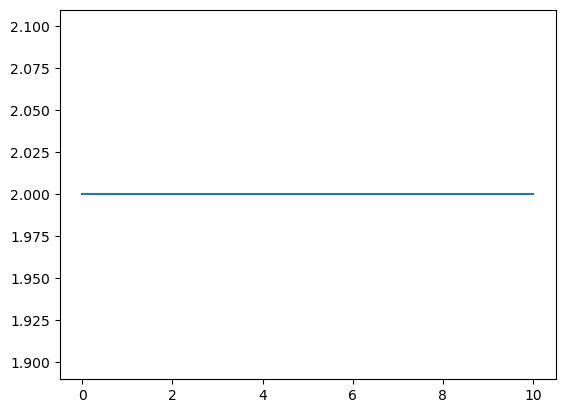

In [108]:
f = lambda x: np.sin(x) + np.sin(x/7) + np.sin(x/5) - np.sin(x/3) + np.sin(9*x) * np.exp(-x ** 2) + 1.5 + np.random.normal(0,2e-2,x.shape)
f = lambda x: 2*np.ones_like(x)
y = f(x)
plt.plot(x,y)

Create train and evaluation split. Also create dataloaders.

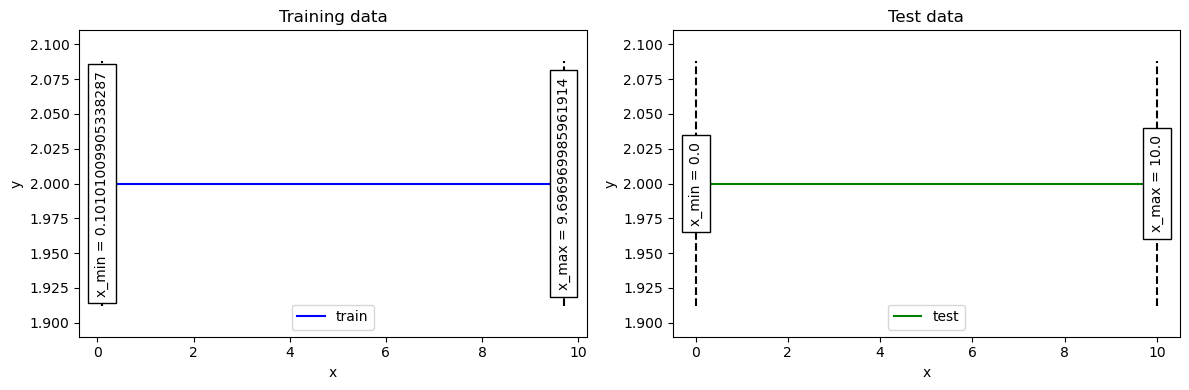

In [109]:
dataloaders = create_dataloaders(x,y,plot_data=True)

# Define model architecture

Create model architecture function.

In [110]:
class LinearNet(nn.Module):
    def __init__(self, hidden_size=256, dropout_p=0):
        super().__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.relu = nn.ReLU()
        self.do = nn.Dropout(p=dropout_p)
        self.fc2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.do(x)
        x = self.fc2(x)
        return x

Model with dropout

In [115]:
sgd_parameters = {
    'lr':1e-3,        # undefined
    'momentum':0,   # 0
    'dampening':0,    # 0
    'weight_decay':0  # 0
}
loss_fn = nn.MSELoss()
model = LinearNet(dropout_p=0, hidden_size=4)
optimizer = torch.optim.SGD(model.parameters(), **sgd_parameters)
use_modded = False

hist = train_model(
    model,
    dataloaders,
    loss_fn,
    optimizer,
    num_epochs=3000
    )

Epoch 0/2999
Epoch 100/2999
Epoch 200/2999
Epoch 300/2999
Epoch 400/2999
Epoch 500/2999
Epoch 600/2999
Epoch 700/2999
Epoch 800/2999
Epoch 900/2999
Epoch 1000/2999
Epoch 1100/2999
Epoch 1200/2999
Epoch 1300/2999
Epoch 1400/2999
Epoch 1500/2999
Epoch 1600/2999
Epoch 1700/2999
Epoch 1800/2999
Epoch 1900/2999
Epoch 2000/2999
Epoch 2100/2999
Epoch 2200/2999
Epoch 2300/2999
Epoch 2400/2999
Epoch 2500/2999
Epoch 2600/2999
Epoch 2700/2999
Epoch 2800/2999
Epoch 2900/2999
Training complete in 0m 6s


plot train and eval loss

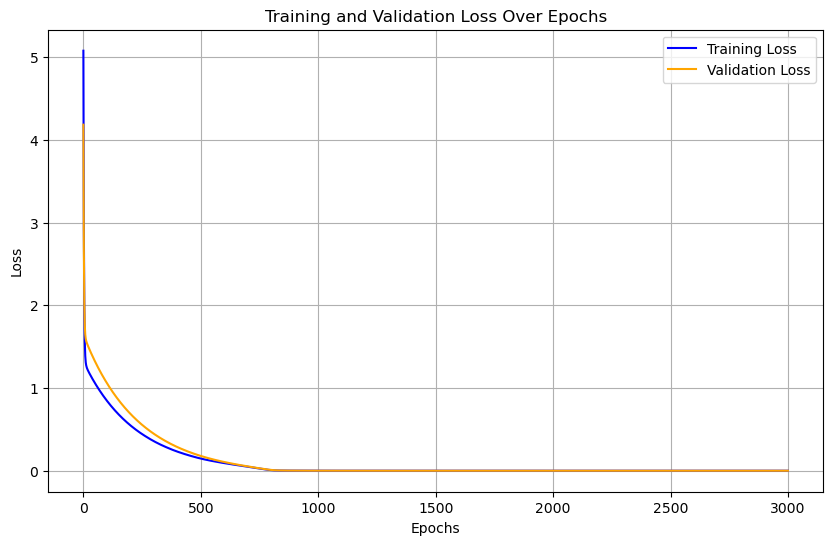

In [116]:
plot_loss_hist(hist["train"],hist["eval"])

Plot model function

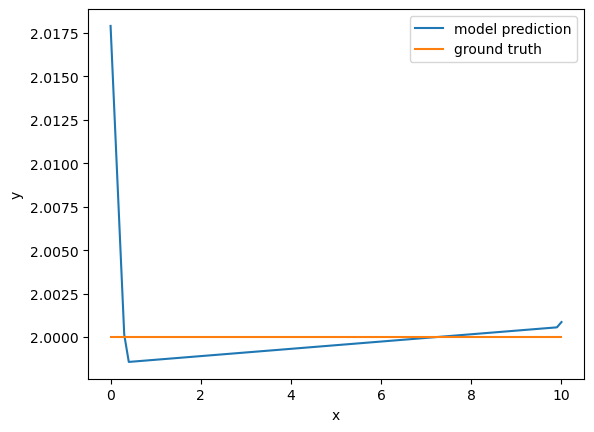

In [117]:
plot_model_mapping(model, x, y)

print parameter weights

In [118]:
for p in model.named_parameters():
    # print(p)
    variance = np.var(p[1].detach().numpy())
    print(f'Variance in {p[0]} {variance}')

Variance in fc1.weight 0.3159254491329193
Variance in fc1.bias 0.382030725479126
Variance in fc2.weight 0.0894547700881958
Variance in fc2.bias 0.0


show piecewise functions

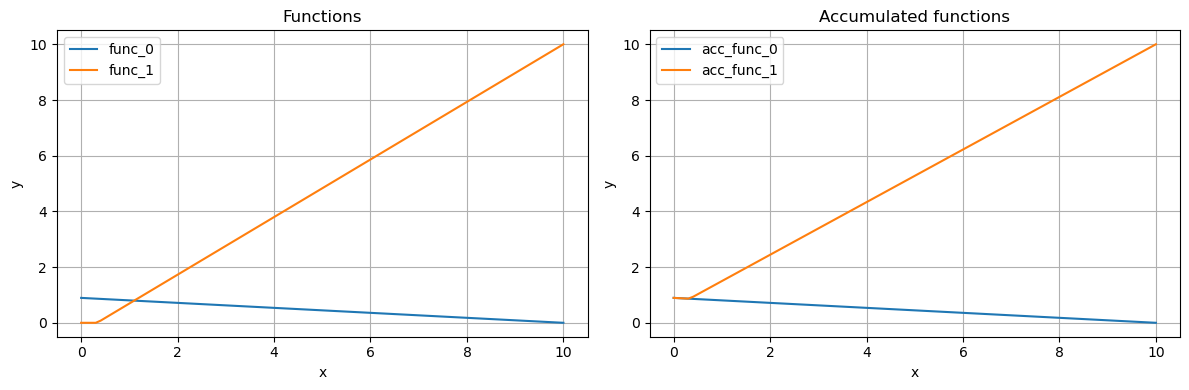

In [120]:
plot_functions(x,model.fc1)

## Finetuning

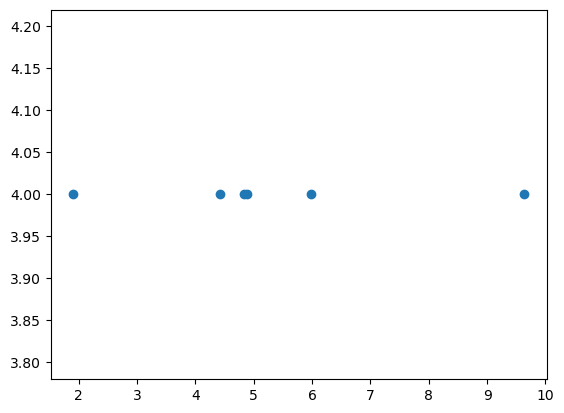

In [95]:
x_finetune = (np.random.random(6)*10).astype(np.float32)
f_finetune = lambda x: 4*np.ones_like(x)
y_finetune = f_finetune(x_finetune)
plt.scatter(x_finetune,y_finetune)

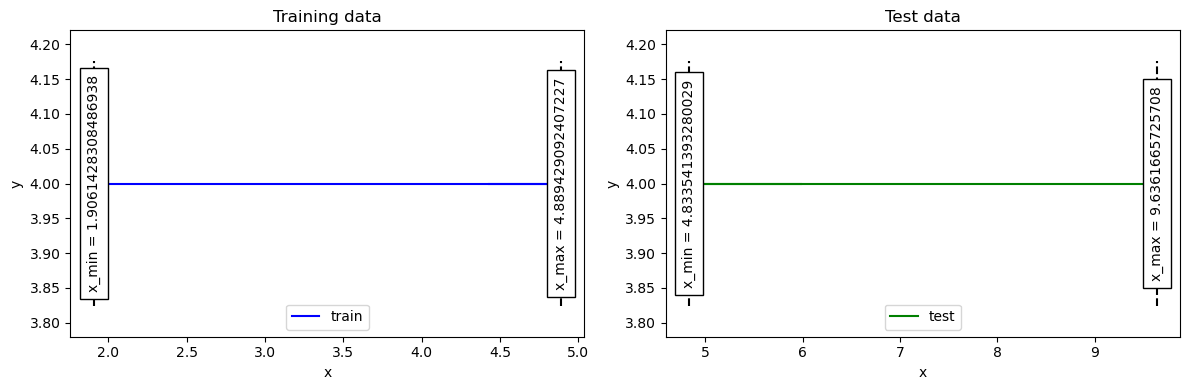

In [96]:
dataloaders_finetune = create_dataloaders(x_finetune,y_finetune, plot_data=True)

In [97]:
use_modded = False

# Modded preparation
hooks_dict = attach_hooks_to_layer(model.fc2)#, args.original_gradient_fraction)
dropout_modules = [module for module in model.modules() if isinstance(module,torch.nn.Dropout)]
catch_dropout = 0
catch_dropouts = [catch_dropout for _ in dropout_modules]
insert_dropout = 0
insert_dropouts = [insert_dropout for _ in dropout_modules]
for module, p in zip(dropout_modules,insert_dropouts):
        module.p = p
        
hist_finetune = train_model(
    model,
    dataloaders_finetune,
    loss_fn,
    optimizer,
    num_epochs=3000
    )

Epoch 0/2999
Stopping early after epoch 13
Training complete in 0m 0s


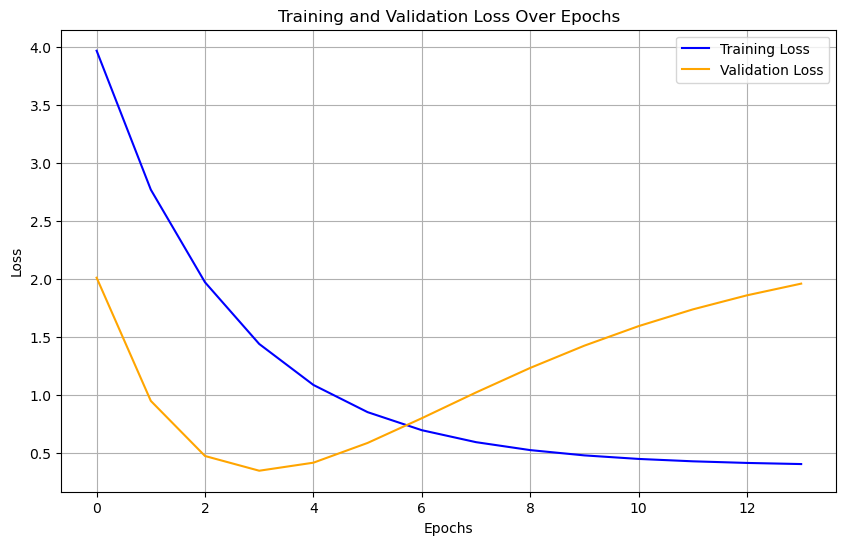

In [98]:
plot_loss_hist(hist_finetune["train"],hist_finetune["eval"])

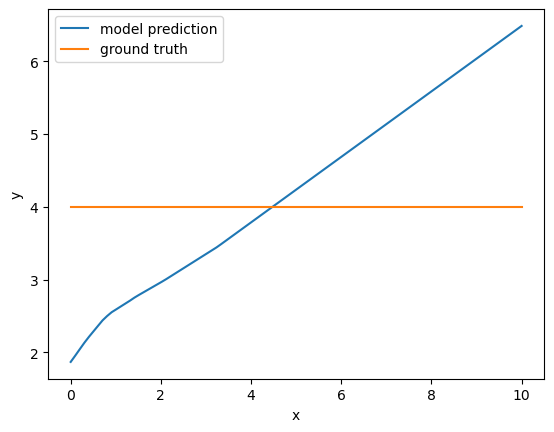

In [99]:
plot_model_mapping(model, x, f_finetune(x))

## Old

In [31]:
model.fc1.weight = torch.nn.Parameter(torch.tensor([[-1.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]]))
print(model.fc1.weight)
model.fc1.bias = torch.nn.Parameter(torch.tensor([0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0]))
print(model.fc1.bias)
model.fc2.weight = torch.nn.Parameter(torch.tensor([[0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]))
print(model.fc2.weight)
model.fc1.bias = torch.nn.Parameter(torch.tensor([0.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0]))
print(model.fc1.bias)

Parameter containing:
tensor([[-1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]], requires_grad=True)
Parameter containing:
tensor([0.9000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       requires_grad=True)
Parameter containing:
tensor([[0.3000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
       requires_grad=True)
Parameter containing:
tensor([0.9900, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       requires_grad=True)


In [32]:
for param in model.named_parameters():
    print(param)

('fc1.weight', Parameter containing:
tensor([[-1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]], requires_grad=True))
('fc1.bias', Parameter containing:
tensor([0.9900, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
       requires_grad=True))
('fc2.weight', Parameter containing:
tensor([[0.3000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],
       requires_grad=True))
('fc2.bias', Parameter containing:
tensor([0.9883], requires_grad=True))


In [20]:
for param in model.named_parameters():
    print(param)

('fc1.weight', Parameter containing:
tensor([[-0.8865],
        [ 0.4241],
        [ 0.1196],
        [ 0.8044],
        [ 0.5714],
        [-0.4208],
        [-0.6756],
        [ 0.4726]], requires_grad=True))
('fc1.bias', Parameter containing:
tensor([ 0.9042,  0.8536, -0.3502, -0.4362, -0.6332, -0.8554, -0.3618,  0.6926],
       requires_grad=True))
('fc2.weight', Parameter containing:
tensor([[ 0.3123,  0.3939,  0.0489, -0.2489, -0.3659, -0.1358,  0.2268,  0.5013]],
       requires_grad=True))
('fc2.bias', Parameter containing:
tensor([0.9883], requires_grad=True))


Epoch 0/2999
Epoch 100/2999
Epoch 200/2999
Epoch 300/2999
Epoch 400/2999
Epoch 500/2999
Epoch 600/2999
Epoch 700/2999
Epoch 800/2999
Epoch 900/2999
Epoch 1000/2999
Epoch 1100/2999
Epoch 1200/2999
Epoch 1300/2999
Epoch 1400/2999
Epoch 1500/2999
Epoch 1600/2999
Epoch 1700/2999
Epoch 1800/2999
Epoch 1900/2999
Epoch 2000/2999
Epoch 2100/2999
Epoch 2200/2999
Epoch 2300/2999
Epoch 2400/2999
Epoch 2500/2999
Epoch 2600/2999
Epoch 2700/2999
Epoch 2800/2999
Epoch 2900/2999
Training complete in 0m 19s
Epoch 0/2999
Epoch 100/2999
Epoch 200/2999
Epoch 300/2999
Epoch 400/2999
Epoch 500/2999
Epoch 600/2999
Epoch 700/2999
Epoch 800/2999
Epoch 900/2999
Epoch 1000/2999
Epoch 1100/2999
Epoch 1200/2999
Epoch 1300/2999
Epoch 1400/2999
Epoch 1500/2999
Epoch 1600/2999
Epoch 1700/2999
Epoch 1800/2999
Epoch 1900/2999
Epoch 2000/2999
Epoch 2100/2999
Epoch 2200/2999
Epoch 2300/2999
Epoch 2400/2999
Epoch 2500/2999
Epoch 2600/2999
Epoch 2700/2999
Epoch 2800/2999
Epoch 2900/2999
Training complete in 0m 21s
Epoch 0/

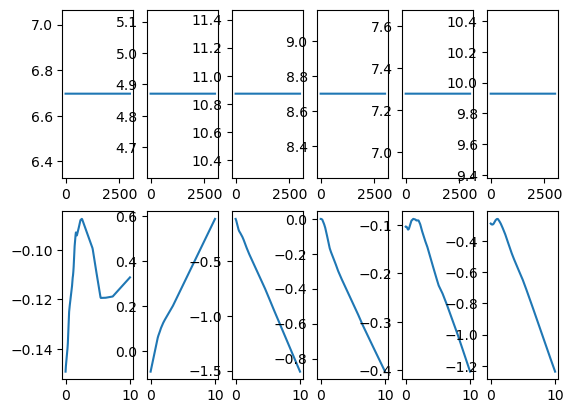

In [35]:
sgd_parameters = {
    'lr':1e-3,        # undefined
    'momentum':0,   # 0
    'dampening':0,    # 0
    'weight_decay':0  # 0
}
loss_fn = nn.MSELoss()
dropout_list = [0, 0.2, 0.4, 0.6, 0.8, 0.9]

fig, axs = plt.subplots(2, len(dropout_list))

for idx, dropout_prob in enumerate(dropout_list):
    optimizer = torch.optim.SGD(model.parameters(), **sgd_parameters)
    model = LinearNet(dropout_prob)
    hist = train_model(model,
                    dataloaders,
                    loss_fn,
                    optimizer,
                    num_epochs=3000
                    )

    axs[0,idx].plot(hist)
    axs[1,idx].plot(x,model(torch.from_numpy(x).unsqueeze(1)).detach().numpy())

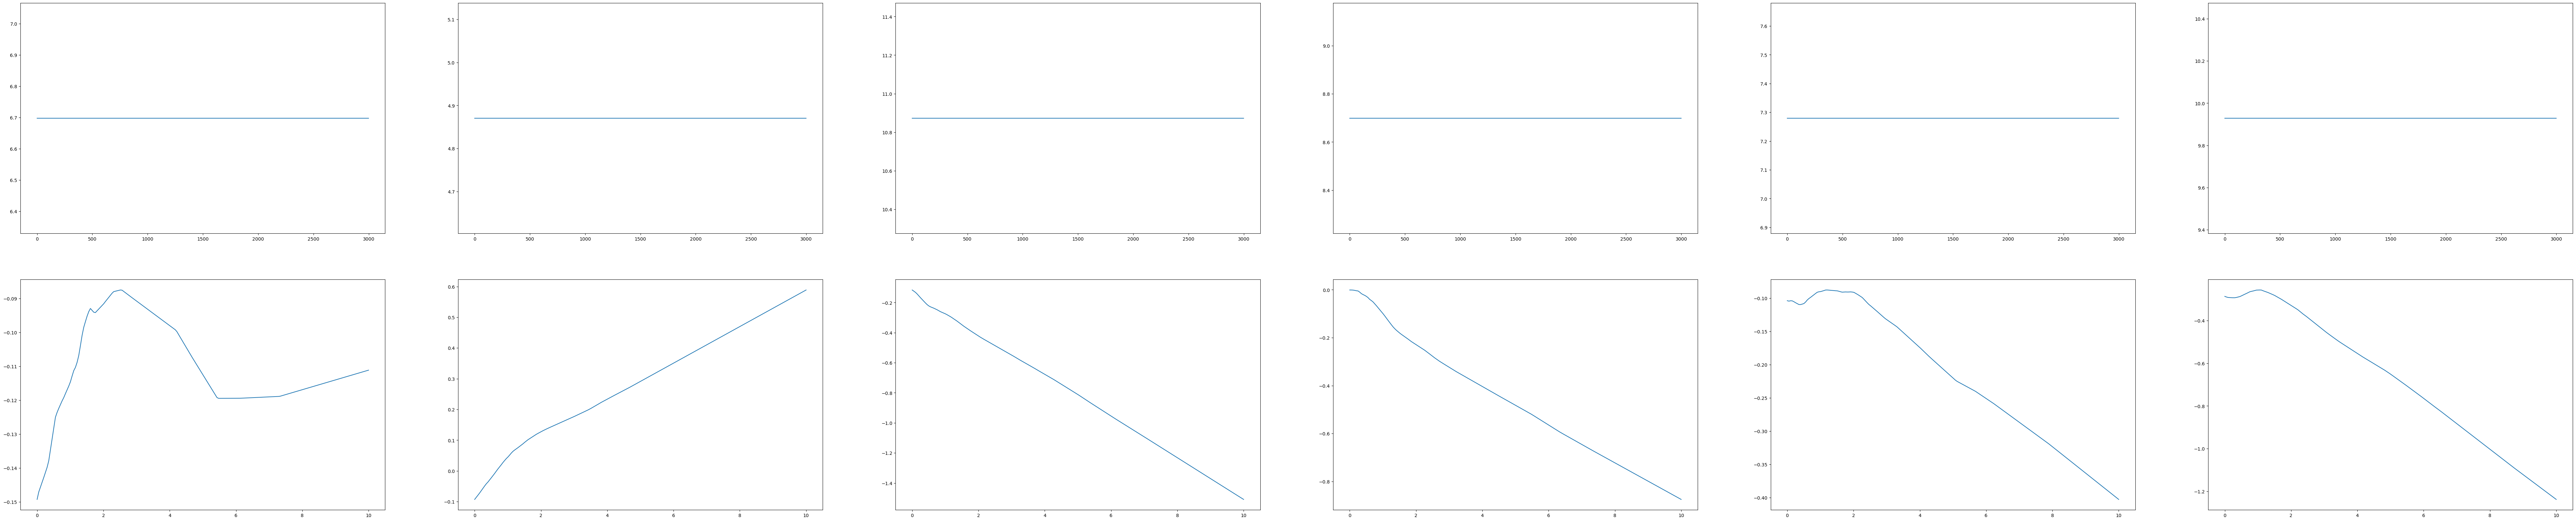

In [39]:
fig.set_size_inches(100, 20)
fig

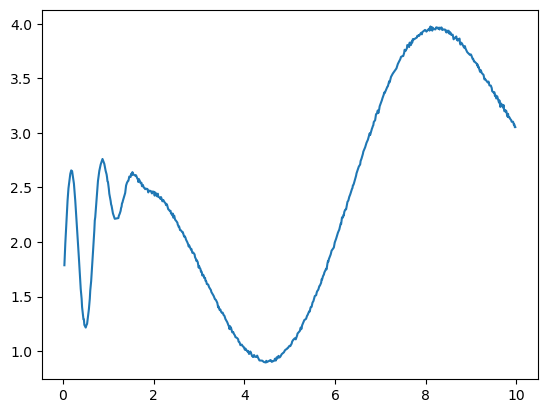

In [ ]:
plt.plot(x[train_mask],y[train_mask])

# Test with data

In [1]:
from transformers import (
    AutoConfig,
    AutoModelForSequenceClassification,
    AutoModel,
    AutoTokenizer,
    DataCollatorWithPadding,
    PretrainedConfig,
    SchedulerType,
    default_data_collator,
    get_scheduler,
)
from torch.utils.data import DataLoader, random_split
from datasets import load_dataset
from torch import nn
import torch

In [2]:
task_to_keys = {
    "cola": ("sentence", None),
    "mnli": ("premise", "hypothesis"),
    "mrpc": ("sentence1", "sentence2"),
    "qnli": ("question", "sentence"),
    "qqp": ("question1", "question2"),
    "rte": ("sentence1", "sentence2"),
    "sst2": ("sentence", None),
    "stsb": ("sentence1", "sentence2"),
    "wnli": ("sentence1", "sentence2"),
}
task_name = "rte"
raw_datasets = load_dataset("glue", task_name)
label_list = raw_datasets["train"].features["label"].names
num_labels = len(label_list)
is_regression = False
model_name_or_path = "bert-base-cased"
config = AutoConfig.from_pretrained(model_name_or_path)
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name_or_path,
    from_tf=bool(".ckpt" in model_name_or_path),
    config=config,
    ignore_mismatched_sizes=False,
    )

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
model.dropout

Dropout(p=0.1, inplace=False)

In [9]:
from torch import nn
module_list = []
for m in model.named_modules():
    print(m)
    module_list.append(m)
# print(nn.Identity().requires_grad_())
# dir(nn.Identity())


('', BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_se

In [50]:
for p in model.named_parameters():
    print(f'{p[0]} requires grad: {p[1].requires_grad}')

bert.embeddings.word_embeddings.weight requires grad: True
bert.embeddings.position_embeddings.weight requires grad: True
bert.embeddings.token_type_embeddings.weight requires grad: True
bert.embeddings.LayerNorm.weight requires grad: True
bert.embeddings.LayerNorm.bias requires grad: True
bert.encoder.layer.0.attention.self.query.weight requires grad: True
bert.encoder.layer.0.attention.self.query.bias requires grad: True
bert.encoder.layer.0.attention.self.key.weight requires grad: True
bert.encoder.layer.0.attention.self.key.bias requires grad: True
bert.encoder.layer.0.attention.self.value.weight requires grad: True
bert.encoder.layer.0.attention.self.value.bias requires grad: True
bert.encoder.layer.0.attention.output.dense.weight requires grad: True
bert.encoder.layer.0.attention.output.dense.bias requires grad: True
bert.encoder.layer.0.attention.output.LayerNorm.weight requires grad: True
bert.encoder.layer.0.attention.output.LayerNorm.bias requires grad: True
bert.encoder.laye

In [2]:
task_to_keys = {
    "cola": ("sentence", None),
    "mnli": ("premise", "hypothesis"),
    "mrpc": ("sentence1", "sentence2"),
    "qnli": ("question", "sentence"),
    "qqp": ("question1", "question2"),
    "rte": ("sentence1", "sentence2"),
    "sst2": ("sentence", None),
    "stsb": ("sentence1", "sentence2"),
    "wnli": ("sentence1", "sentence2"),
}
task_name = "rte"
raw_datasets = load_dataset("glue", task_name)
label_list = raw_datasets["train"].features["label"].names
num_labels = len(label_list)
is_regression = False

model_name_or_path = "bert-base-cased"

config = AutoConfig.from_pretrained(model_name_or_path, num_labels=num_labels, finetuning_task=task_name)
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name_or_path,
    from_tf=bool(".ckpt" in model_name_or_path),
    config=config,
    ignore_mismatched_sizes=False,
    )

Found cached dataset glue (C:/Users/Valentin/.cache/huggingface/datasets/glue/rte/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initi

In [3]:
model.config.label2id

{'LABEL_0': 0, 'LABEL_1': 1}

In [4]:
PretrainedConfig(num_labels=num_labels).label2id

{'LABEL_0': 0, 'LABEL_1': 1}

In [5]:
# Preprocessing the datasets
sentence1_key, sentence2_key = task_to_keys[task_name]


# Some models have set the order of the labels to use, so let's make sure we do use it.
label_to_id = None
if (
    model.config.label2id != PretrainedConfig(num_labels=num_labels).label2id
    and task_name is not None
):
    # Some have all caps in their config, some don't.
    label_name_to_id = {k.lower(): v for k, v in model.config.label2id.items()}
    if sorted(label_name_to_id.keys()) == sorted(label_list):
        label_to_id = {i: label_name_to_id[label_list[i]] for i in range(num_labels)}
elif task_name is None:
    label_to_id = {v: i for i, v in enumerate(label_list)}

if label_to_id is not None:
    model.config.label2id = label_to_id
    model.config.id2label = {id: label for label, id in config.label2id.items()}
elif task_name is not None and not is_regression:
    model.config.label2id = {l: i for i, l in enumerate(label_list)}
    model.config.id2label = {id: label for label, id in config.label2id.items()}

padding = False
max_length = 128

def preprocess_function(examples):
    # Tokenize the texts
    texts = (
        (examples[sentence1_key],) if sentence2_key is None else (examples[sentence1_key], examples[sentence2_key])
    )
    result = tokenizer(*texts, padding=padding, max_length=max_length, truncation=True)

    if "label" in examples:
        if label_to_id is not None:
            # Map labels to IDs (not necessary for GLUE tasks)
            result["labels"] = [label_to_id[l] for l in examples["label"]]
        else:
            # In all cases, rename the column to labels because the model will expect that.
            result["labels"] = examples["label"]
    return result

processed_datasets = raw_datasets.map(
    preprocess_function,
    batched=True,
    remove_columns=raw_datasets["train"].column_names,
    desc="Running tokenizer on dataset",
)

train_dataset = processed_datasets["train"]
eval_dataset = processed_datasets["validation_matched" if task_name == "mnli" else "validation"]
data_collator = DataCollatorWithPadding(tokenizer, pad_to_multiple_of=None)
batch_size = 3

train_dataloader = DataLoader(
        train_dataset, shuffle=True, collate_fn=data_collator, batch_size=batch_size
)
eval_dataloader = DataLoader(eval_dataset, collate_fn=data_collator, batch_size=batch_size)


Loading cached processed dataset at C:\Users\Valentin\.cache\huggingface\datasets\glue\rte\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad\cache-1f10d1f2f53e0be4.arrow
Loading cached processed dataset at C:\Users\Valentin\.cache\huggingface\datasets\glue\rte\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad\cache-a63622d1e29c267b.arrow
Loading cached processed dataset at C:\Users\Valentin\.cache\huggingface\datasets\glue\rte\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad\cache-85bb0cd57dac3d6c.arrow


In [6]:
raw_datasets['validation'][0]

{'sentence1': 'Dana Reeve, the widow of the actor Christopher Reeve, has died of lung cancer at age 44, according to the Christopher Reeve Foundation.',
 'sentence2': 'Christopher Reeve had an accident.',
 'label': 1,
 'idx': 0}

In [7]:
for batch in eval_dataloader:
    print(model(**batch))
    break

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


SequenceClassifierOutput(loss=tensor(0.6399, grad_fn=<NllLossBackward0>), logits=tensor([[0.1436, 0.6108],
        [0.1570, 0.6002],
        [0.1605, 0.6083]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [12]:
import evaluate

eval_loss = 0
predicted_logits = torch.empty(0,2)
predicted_probabilites = torch.empty(0,2)
predictions = torch.empty(0)
softmax_fn = nn.Softmax(dim=1)
metric = evaluate.load("glue", task_name)
model.eval()
# model.train()

for step, batch in enumerate(eval_dataloader):
    with torch.no_grad():
        outputs = model(**batch)
        eval_loss += outputs.loss.detach().float()
    predicted_logits = torch.cat([predicted_logits, outputs.logits],dim=0)
    predicted_probabilites = torch.cat([predicted_probabilites, softmax_fn(outputs.logits)],dim=0)
    preds = outputs.logits.argmax(dim=-1) if not is_regression else outputs.logits.squeeze()
    predictions = torch.cat([predictions, preds],dim=0)
    metric.add_batch(
                predictions=preds,
                references=batch["labels"],
    )
    # break


eval_metric = metric.compute()
print(eval_metric)
print(eval_loss/len(eval_dataloader))
    # predictions, references = accelerator.gather((predictions, batch["labels"]))

{'accuracy': 0.48014440433212996}
tensor(0.7349)


In [9]:
import pandas as pd
df = pd.DataFrame(torch.concat([predicted_logits,
                                predicted_probabilites,
                                torch.unsqueeze(predictions,1)],dim=1).numpy(),
                  columns=["l_0","l_1","p_0","p_1","y_hat"])
df

,l_0,l_1,p_0,p_1,y_hat
0,0.143629,0.610841,0.385276,0.614724,1.0
1,0.157030,0.600165,0.390994,0.609006,1.0
2,0.160473,0.608255,0.389888,0.610112,1.0
3,0.141667,0.591365,0.389433,0.610567,1.0
4,0.149655,0.588314,0.392061,0.607939,1.0
...,...,...,...,...,...
272,0.163311,0.598437,0.392903,0.607097,1.0
273,0.154939,0.609465,0.388285,0.611715,1.0
274,0.166940,0.594492,0.394711,0.605289,1.0
275,0.162064,0.605645,0.390888,0.609112,1.0


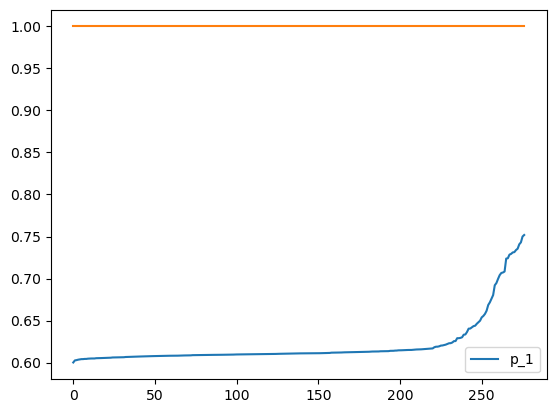

In [10]:
df.sort_values(by="p_1").reset_index().plot(y="p_1").plot(df["y_hat"])

# Stratified train data

In [3]:
from datasets import load_dataset
raw_datasets = load_dataset("glue", 'rte')


Found cached dataset glue (C:/Users/Valentin/.cache/huggingface/datasets/glue/rte/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
train_dataset = raw_datasets["train"]
len(train_dataset)

2490

In [18]:
train_dataset.data

2490

In [9]:
dir(train_dataset)

['_TF_DATASET_REFS',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getitems__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_local_temp_path',
 '_check_index_is_initialized',
 '_data',
 '_estimate_nbytes',
 '_fingerprint',
 '_format_columns',
 '_format_kwargs',
 '_format_type',
 '_get_cache_file_path',
 '_get_output_signature',
 '_getitem',
 '_indexes',
 '_indices',
 '_info',
 '_iter_shards',
 '_map_single',
 '_new_dataset_with_indices',
 '_output_all_columns',
 '_push_parquet_shards_to_hub',
 '_save_to_disk_single',
 '_select_contiguous',
 '_select_with_indices_mapping',
 '_split',
 'add_column',
 'add_elasticsearch_ind

In [31]:
train_dataset.info

DatasetInfo(description='GLUE, the General Language Understanding Evaluation benchmark\n(https://gluebenchmark.com/) is a collection of resources for training,\nevaluating, and analyzing natural language understanding systems.\n\n', citation='@inproceedings{dagan2005pascal,\n  title={The PASCAL recognising textual entailment challenge},\n  author={Dagan, Ido and Glickman, Oren and Magnini, Bernardo},\n  booktitle={Machine Learning Challenges Workshop},\n  pages={177--190},\n  year={2005},\n  organization={Springer}\n}\n@inproceedings{bar2006second,\n  title={The second pascal recognising textual entailment challenge},\n  author={Bar-Haim, Roy and Dagan, Ido and Dolan, Bill and Ferro, Lisa and Giampiccolo, Danilo and Magnini, Bernardo and Szpektor, Idan},\n  booktitle={Proceedings of the second PASCAL challenges workshop on recognising textual entailment},\n  volume={6},\n  number={1},\n  pages={6--4},\n  year={2006},\n  organization={Venice}\n}\n@inproceedings{giampiccolo2007third,\n  

0.4983935742971888

In [49]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
train_size = 2
batch_size = 32
seed = 42

train_indices, validation_indices, _, _ = train_test_split(
    range(len(train_dataset)),
    train_dataset["label"],
    stratify=train_dataset["label"],
    train_size=train_size,
    random_state=seed
)

train_indices

[1618, 1364]

In [50]:
from torch.utils.data import Subset
train_split = Subset(train_dataset,train_indices)
len(train_split)

2

In [51]:
print(sum(train_dataset["label"])/len(train_dataset["label"]))
subset_labels = [train_dataset["label"][i] for i in train_indices]
print(sum(subset_labels)/len(subset_labels))

0.4983935742971888
0.5


In [55]:
subsetA = Subset(train_dataset,train_indices)
print(len(subsetA))
subsetB = Subset(raw_datasets["validation"], train_indices)
print(len(subsetB))

2
2


In [57]:
[concatSet]*4

In [56]:
from torch.utils.data import ConcatDataset
concatSet = ConcatDataset([subsetA,subsetB])
print(len(concatSet))

4


# Modify wandb runs

In [1]:
from dotenv import load_dotenv
import os
load_dotenv("./.env")
WANDB_API_KEY = os.getenv("WANDB_API_KEY")

In [1]:
import wandb

api = wandb.Api()

for run in api.runs("ricu/fantastic-umbrella"):
    run.config
    break
    # run.summary["eval_loss"] = run.history()["eval_loss"].min()
    # run.summary["train_loss"] = run.history()["train_loss"].min()
    # run.summary["accuracy"] = run.history()["accuracy"].max()
    # run.update()

In [8]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('gen_09.csv')
df

,Name,Runtime,Notes,Tags,catch_dropout,insert_dropout,accuracy,epoch,eval_loss,learning_rate,train_loss
0,run_09_06_modded,1506,-,gen_09,0.00,0.3,0.682310,35,0.649753,9.927646e-07,0.690606
1,run_09_02_modded,872,-,gen_09,0.01,0.1,0.671480,20,0.651077,9.964325e-07,0.370818
2,run_09_00_modded,771,-,gen_09,0.00,0.1,0.664260,19,0.655539,9.966770e-07,0.407902
3,run_09_03_modded,1068,-,gen_09,0.00,0.2,0.664260,25,0.647706,9.952099e-07,0.621158
4,run_09_05_modded,1086,-,gen_09,0.01,0.2,0.660650,25,0.646430,9.952099e-07,0.609989
5,run_09_01_modded,829,-,gen_09,0.05,0.1,0.657040,19,0.657123,9.966770e-07,0.381091
6,run_09_08_modded,1431,-,gen_09,0.01,0.3,0.653430,33,0.647832,9.932537e-07,0.694223
7,run_09_04_modded,960,-,gen_09,0.05,0.2,0.653430,22,0.652789,9.959434e-07,0.580971
8,run_09_07_modded,1436,-,gen_09,0.05,0.3,0.638989,33,0.651285,9.932537e-07,0.692367
9,run_09_09_modded,2123,-,gen_09,0.00,0.4,0.631769,50,0.659596,9.890968e-07,0.712322


<Axes: xlabel='insert_dropout', ylabel='accuracy'>

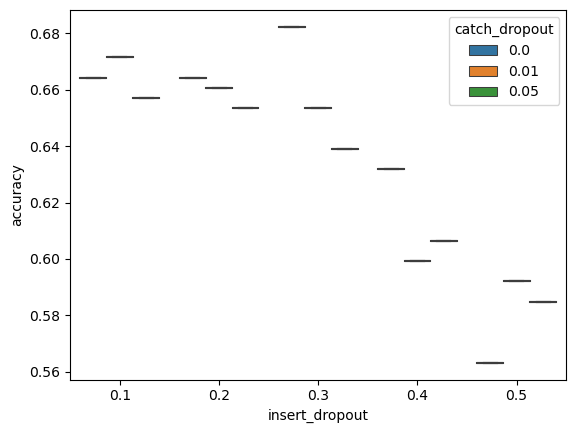

In [11]:
sns.boxplot(data=df,x='insert_dropout',y='accuracy',hue='catch_dropout')

# Measuring uncertainty

In [134]:
import numpy as np

probs = np.zeros(10)
probs[0] = 0.5
probs[1:3] = 0.25
print(probs)
print(f'Variance {probs.var()}')

[0.5  0.25 0.25 0.   0.   0.   0.   0.   0.   0.  ]
Variance 0.027500000000000004


In [135]:
probs = np.zeros(10)
probs[0] = 0.5
probs[1] = 0.4
probs[2] = 0.1
print(probs)
print(f'Variance {probs.var()}')

[0.5 0.4 0.1 0.  0.  0.  0.  0.  0.  0. ]
Variance 0.03200000000000001


In [137]:
probs = np.zeros(2)
probs[0] = 0.9
probs[1] = 0.1
print(probs)
print(f'Variance {probs.var()}')

[0.9 0.1]
Variance 0.16000000000000003


In [8]:
import re
s = "ab_a"
def isPalindrome(s: str) -> bool:
        if len(s) <= 1:
            return True
        s_an = re.sub(r'[^a-zA-Z0-9]','', s).lower()
        print(s_an)
        n_an = len(s_an)

        for i in range(int(n_an)):
            if s_an[i] != s_an[-i-1]:
                return False
        return True
print(isPalindrome(s))

aba
True


In [37]:
from datasets import load_dataset
from pprint import pprint
raw_datasets = load_dataset("glue", 'rte')
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 2490
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 277
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3000
    })
})

In [48]:
set(map(lambda x: x['label'],raw_datasets['test']))

{-1}

In [39]:
raw_datasets['test'][0]

{'sentence1': "Mangla was summoned after Madhumita's sister Nidhi Shukla, who was the first witness in the case.",
 'sentence2': 'Shukla is related to Mangla.',
 'label': -1,
 'idx': 0}

In [2]:
eval_metrics = {
    'loss' : 'min',
    'acc' : 'max'
}
{metric_name : (float('inf') if metric_direction == 'min' else -float('inf')) for metric_name, metric_direction in eval_metrics.items()}

{'loss': inf, 'acc': -inf}

In [1]:
from transformers import AutoModelForSequenceClassification, AutoConfig
model_name = 'bert-base-cased'
config = AutoConfig.from_pretrained(model_name, num_labels=2, finetuning_task='rte')
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    from_tf=bool(".ckpt" in model_name),
    config=config,
    ignore_mismatched_sizes=False,
)


c:\Users\Valentin\miniconda3\envs\fantastic-umbrella_2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
list(model.classifier.parameters())

[Parameter containing:
 tensor([[ 0.0007,  0.0124, -0.0035,  ...,  0.0098, -0.0125,  0.0007],
         [-0.0032, -0.0002,  0.0297,  ..., -0.0166,  0.0174,  0.0316]],
        requires_grad=True),
 Parameter containing:
 tensor([0., 0.], requires_grad=True)]

In [11]:
config

BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "finetuning_task": "rte",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

# Evaluate test

In [1]:
import evaluate

c:\Users\Valentin\miniconda3\envs\fantastic-umbrella_2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
metric = evaluate.load("glue", 'stsb') 

In [8]:
metric.hash

AttributeError: 'Glue' object has no attribute 'hash'

In [11]:
type(metric)

evaluate_modules.metrics.evaluate-metric--glue.05234ba7acc44554edcca0978db5fa3bc600eeee66229abe79ff9887eacaf3ed.glue.Glue

In [12]:
metric.add(predictions=0,references=0)
list(metric.compute().keys())

ValueError: x and y must have length at least 2.

In [13]:
metric.add_batch(predictions=[1,1,0,0],references=[1,0,1,0])
list(metric.compute().keys())

['pearson', 'spearmanr']

In [24]:
metric.add(prediction=0.5,reference=1)
print(metric.compute())

# print(metric.compute())

{'accuracy': 0.0}


In [36]:
metric.add(prediction=0,reference=0)
print(list(metric.compute().keys()))

['accuracy']


In [4]:
dir(metric)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_data_dir',
 '_check_all_processes_locks',
 '_check_rendez_vous',
 '_compute',
 '_create_cache_file',
 '_data_dir_root',
 '_download_and_prepare',
 '_enforce_nested_string_type',
 '_feature_names',
 '_finalize',
 '_get_all_cache_files',
 '_hash',
 '_infer_feature_from_batch',
 '_infer_feature_from_example',
 '_info',
 '_init_writer',
 '_module_info',
 'add',
 'add_batch',
 'buf_writer',
 'cache_file_name',
 'citation',
 'codebase_urls',
 'compute',
 'config_name',
 'data',
 'data_dir',
 'description',
 'download_and_prepare',
 'experiment_id',
 'features',
 'file_paths',
 'filelock',
 'filel

In [52]:
output_dir = "/home/lange/fantastic-umbrella/runs/run_11a_00_modded"
"/".join(output_dir.split("/")[-2:])

'runs/run_11a_00_modded'

# GLUE DATASETS

In [1]:
from datasets import load_dataset
task_to_keys = {
    "cola": ("sentence", None),
    "mnli": ("premise", "hypothesis"),
    "mrpc": ("sentence1", "sentence2"),
    "qnli": ("question", "sentence"),
    "qqp": ("question1", "question2"),
    "rte": ("sentence1", "sentence2"),
    "sst2": ("sentence", None),
    "stsb": ("sentence1", "sentence2"),
    "wnli": ("sentence1", "sentence2"),
}

c:\Users\Valentin\miniconda3\envs\fantastic-umbrella_2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
from collections import Counter
for task_name in task_to_keys:
    raw_datasets = load_dataset("glue", task_name)
    print('#'*8 + task_name + '#'*8)
    print(f'Available splits: ' + str(list(raw_datasets.keys())) )
    for split_name, split in raw_datasets.items():
        available_classes = set(split["label"])
        n_classes = len(available_classes)
        dataset_length = len(split)
        print(f'Split {str(split_name).capitalize()} contains {dataset_length} samples.')
        print(f'Split {str(split_name).capitalize()} has {n_classes} classes.')
        for label, count in Counter(split["label"]).items():
            print(f'Split {str(split_name).capitalize()} has {count/dataset_length*100}%% class {label} samples.')
        


########cola########
Available splits: ['train', 'validation', 'test']
Split Train contains 8551 samples.
Split Train has 2 classes.
Split Train has 70.43620629166179%% class 1 samples.
Split Train has 29.563793708338203%% class 0 samples.
Split Validation contains 1043 samples.
Split Validation has 2 classes.
Split Validation has 69.12751677852349%% class 1 samples.
Split Validation has 30.87248322147651%% class 0 samples.
Split Test contains 1063 samples.
Split Test has 1 classes.
Split Test has 100.0%% class -1 samples.
########mnli########
Available splits: ['train', 'validation_matched', 'validation_mismatched', 'test_matched', 'test_mismatched']
Split Train contains 392702 samples.
Split Train has 3 classes.
Split Train has 33.33316356932228%% class 1 samples.
Split Train has 33.332908923305716%% class 0 samples.
Split Train has 33.333927507372%% class 2 samples.
Split Validation_matched contains 9815 samples.
Split Validation_matched has 3 classes.
Split Validation_matched has 3

stsb

In [7]:
import statistics
d = load_dataset("glue", 'stsb')
for dataset_name, dataset in d.items():
    print(dataset_name)
    print(f'MEAN: {statistics.mean(dataset["label"])}')
    print(f'STDEV: {statistics.stdev(dataset["label"])}')
# d = load_dataset("glue", 'stsb')

train
MEAN: 2.7009990240624933
STDEV: 1.4643982105837248
validation
MEAN: 2.3639075540602206
STDEV: 1.5004856453975883
test
MEAN: -1.0
STDEV: 0.0


In [5]:
d = load_dataset("glue", 'stsb')["train"]["label"]
d

[5.0,
 3.799999952316284,
 3.799999952316284,
 2.5999999046325684,
 4.25,
 4.25,
 0.5,
 1.600000023841858,
 2.200000047683716,
 5.0,
 4.199999809265137,
 4.599999904632568,
 3.867000102996826,
 4.666999816894531,
 1.6670000553131104,
 3.75,
 5.0,
 0.5,
 3.799999952316284,
 5.0,
 3.200000047683716,
 2.799999952316284,
 4.599999904632568,
 3.0,
 5.0,
 4.800000190734863,
 5.0,
 4.199999809265137,
 4.199999809265137,
 4.0,
 4.0,
 4.908999919891357,
 3.0,
 2.4000000953674316,
 4.199999809265137,
 3.4000000953674316,
 5.0,
 3.75,
 2.75,
 5.0,
 4.0,
 3.5999999046325684,
 1.600000023841858,
 1.75,
 5.0,
 1.0,
 1.0,
 2.375,
 3.799999952316284,
 3.200000047683716,
 3.200000047683716,
 4.400000095367432,
 3.75,
 4.75,
 3.200000047683716,
 1.555999994277954,
 3.937999963760376,
 5.0,
 5.0,
 4.0,
 1.600000023841858,
 4.75,
 3.5,
 1.399999976158142,
 1.399999976158142,
 4.0,
 5.0,
 3.8329999446868896,
 0.6000000238418579,
 2.9170000553131104,
 4.199999809265137,
 2.0,
 2.5999999046325684,
 1.6000000

In [ ]:
d["train"]

In [27]:
for k,v in Counter(d["validation"]["label"]).items():
    print(f'{k} : {v}')

1 : 721
0 : 322


In [23]:
dict(Counter(d["validation"]["label"]))

{1: 131, 0: 146}

In [9]:
d["train"][:3]

{'sentence1': ['No Weapons of Mass Destruction Found in Iraq Yet.',
  'A place of sorrow, after Pope John Paul II died, became a place of celebration, as Roman Catholic faithful gathered in downtown Chicago to mark the installation of new Pope Benedict XVI.',
  'Herceptin was already approved to treat the sickest breast cancer patients, and the company said, Monday, it will discuss with federal regulators the possibility of prescribing the drug for more breast cancer patients.'],
 'sentence2': ['Weapons of Mass Destruction Found in Iraq.',
  'Pope Benedict XVI is the new leader of the Roman Catholic Church.',
  'Herceptin can be used to treat breast cancer.'],
 'label': [1, 0, 0],
 'idx': [0, 1, 2]}

In [6]:
pre_train_dataset = load_dataset("glue", 'cola')["train"]

In [9]:
from sklearn.model_selection import train_test_split
train_size = 32
train_indices, validation_indices, _, _ = train_test_split(
            range(len(pre_train_dataset)), # dummy indices
            pre_train_dataset["label"], #
            stratify = pre_train_dataset["label"],
            train_size = train_size,
            random_state = 0
        )

In [17]:
train_indices

[397,
 6136,
 7709,
 3308,
 1372,
 5239,
 2451,
 3577,
 6396,
 3208,
 7909,
 8232,
 4235,
 420,
 788,
 2805,
 5688,
 1675,
 3329,
 2843,
 4175,
 5976,
 7117,
 389,
 1713,
 131,
 5875,
 4451,
 5661,
 675,
 4123,
 8426]

In [19]:
reduced_validation_indices, _, _, _ = train_test_split(
            validation_indices, # dummy indices
            [pre_train_dataset["label"][index] for index in validation_indices], #
            stratify = [pre_train_dataset["label"][index] for index in validation_indices],
            train_size = 4,
            random_state = 0
        )

In [20]:
validation_indices2

[5875, 8426, 2805, 788]

In [14]:
from torch.utils.data import DataLoader, Subset, ConcatDataset
Subset(pre_train_dataset,train_indices)["label"]

TypeError: list indices must be integers or slices, not str

In [10]:
train_indices

[397,
 6136,
 7709,
 3308,
 1372,
 5239,
 2451,
 3577,
 6396,
 3208,
 7909,
 8232,
 4235,
 420,
 788,
 2805,
 5688,
 1675,
 3329,
 2843,
 4175,
 5976,
 7117,
 389,
 1713,
 131,
 5875,
 4451,
 5661,
 675,
 4123,
 8426]

In [ ]:
train_indices, validation_indices, _, _ = train_test_split(
            range(len(pre_train_dataset)), # dummy indices
            pre_train_dataset["label"], #
            stratify = pre_train_dataset["label"],
            train_size = train_size,
            random_state = 0
        )

# Tokenizers

In [2]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("tiiuae/falcon-7b-instruct")
tokenizer

c:\Users\Valentin\miniconda3\envs\fantastic-umbrella_2\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Valentin\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Using bos_token, but it is not set yet.
Using unk_token, but it is not set yet.
Using sep_token, but it is not set y

PreTrainedTokenizerFast(name_or_path='tiiuae/falcon-7b-instruct', vocab_size=65024, model_max_length=2048, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'eos_token': '<|endoftext|>', 'additional_special_tokens': ['>>TITLE<<', '>>ABSTRACT<<', '>>INTRODUCTION<<', '>>SUMMARY<<', '>>COMMENT<<', '>>ANSWER<<', '>>QUESTION<<', '>>DOMAIN<<', '>>PREFIX<<', '>>SUFFIX<<', '>>MIDDLE<<']}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken(">>TITLE<<", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken(">>ABSTRACT<<", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken(">>INTRODUCTION<<", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken(">>SUMMARY<<", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken(">>COMMENT<<", rstrip=False, lstrip=False, single_word=False, normaliz

Figure(640x480)


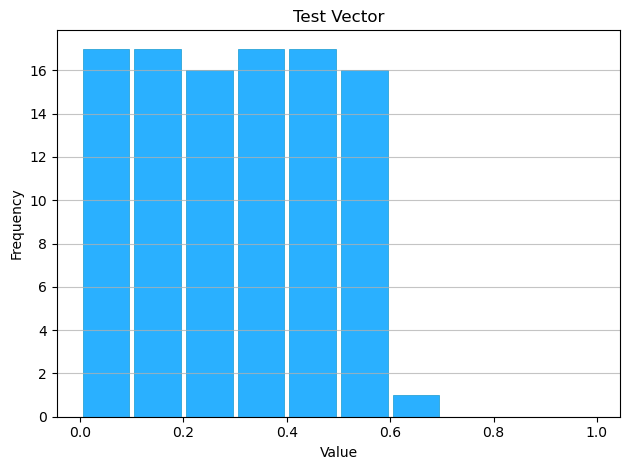

In [6]:
import matplotlib.pyplot as plt
import torch
def create_histograms(data, range = (0,1), title : str = ''):
    fig, ax = plt.subplots(tight_layout=True)
    ax.hist(
        data,
        bins = 10,
        range=range,
        facecolor = '#2ab0ff',
        edgecolor='#169acf',
        linewidth=0.5,
        rwidth=0.9
        )
    ax.grid(axis='y', alpha=0.75)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    return fig

vec = torch.linspace(0,0.6,101)
fig = create_histograms(vec, title='Test Vector')
print(fig)

In [2]:
import torch
import plotly.express as px
import plotly.graph_objects as go
import numpy as np


def plotly_hist(data, range = (0,1), title : str = ''):
    
    values, bins = torch.histogram(vec,bins=10,range=range)
    labels = [f'[{left:.2f}-{right:.2f}]' for left,right in zip(bins[:-1],bins[1:])]
    fig = go.Figure(
        data = go.Bar(
            x=labels,
            y=values,
        ),
        layout = {
            'title' : title,
            "xaxis_title" : "value",
            "yaxis_title" : "count",
            "bargap" : 0.1
        }
    )
    return fig

vec = torch.linspace(0,0.6,101)
fig = plotly_hist(vec, title='Test Vector')
fig.show()

In [11]:
torch.histogram(vec,bins=10,range=(0,1))

torch.return_types.histogram(
hist=tensor([17., 17., 16., 17., 17., 16.,  1.,  0.,  0.,  0.]),
bin_edges=tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000]))

In [16]:
vec[:-1]

tensor([0.0000, 0.0060, 0.0120, 0.0180, 0.0240, 0.0300, 0.0360, 0.0420, 0.0480,
        0.0540, 0.0600, 0.0660, 0.0720, 0.0780, 0.0840, 0.0900, 0.0960, 0.1020,
        0.1080, 0.1140, 0.1200, 0.1260, 0.1320, 0.1380, 0.1440, 0.1500, 0.1560,
        0.1620, 0.1680, 0.1740, 0.1800, 0.1860, 0.1920, 0.1980, 0.2040, 0.2100,
        0.2160, 0.2220, 0.2280, 0.2340, 0.2400, 0.2460, 0.2520, 0.2580, 0.2640,
        0.2700, 0.2760, 0.2820, 0.2880, 0.2940, 0.3000, 0.3060, 0.3120, 0.3180,
        0.3240, 0.3300, 0.3360, 0.3420, 0.3480, 0.3540, 0.3600, 0.3660, 0.3720,
        0.3780, 0.3840, 0.3900, 0.3960, 0.4020, 0.4080, 0.4140, 0.4200, 0.4260,
        0.4320, 0.4380, 0.4440, 0.4500, 0.4560, 0.4620, 0.4680, 0.4740, 0.4800,
        0.4860, 0.4920, 0.4980, 0.5040, 0.5100, 0.5160, 0.5220, 0.5280, 0.5340,
        0.5400, 0.5460, 0.5520, 0.5580, 0.5640, 0.5700, 0.5760, 0.5820, 0.5880,
        0.5940])

### Test NLLloss

In [61]:
from torch.nn import NLLLoss,LogSoftmax, Softmax
import torch
loss_layer = NLLLoss()
log_softmax_layer = LogSoftmax(dim=1)
softmax_layer = Softmax(dim=1)

logits = torch.Tensor([[0.0,0.0],[2.0,0.0],[0.0,2.0]])
logits.requires_grad = True
print(logits)
probs = torch.Tensor(
    [[0.5000, 0.5000],
     [0.8808, 0.1192],
     [0.1192, 0.8808]]
    )
print(probs)
labels = torch.Tensor([[0.0,1.0],[0.0,1.0],[0.0,1.0]])
print(labels)
target = torch.tensor([1, 1, 1])
print(target)

tensor([[0., 0.],
        [2., 0.],
        [0., 2.]], requires_grad=True)
tensor([[0.5000, 0.5000],
        [0.8808, 0.1192],
        [0.1192, 0.8808]])
tensor([[0., 1.],
        [0., 1.],
        [0., 1.]])
tensor([1, 1, 1])


torch.float32

In [57]:
logits.grad = None
print('Softmax output:')
sm = softmax_layer(logits)
print(sm)
print("Expected grad with respect to the logits:")
print(sm-labels)

Softmax output:
tensor([[0.5000, 0.5000],
        [0.8808, 0.1192],
        [0.1192, 0.8808]], grad_fn=<SoftmaxBackward0>)
Expected grad with respect to the logits:
tensor([[ 0.5000, -0.5000],
        [ 0.8808, -0.8808],
        [ 0.1192, -0.1192]], grad_fn=<SubBackward0>)


In [62]:
logits.grad = None
logits.requires_grad = True
lsm = log_softmax_layer(logits)
print("lsm:")
print(lsm)
loss = loss_layer(lsm,target)
print("Loss:")
print(loss)
loss.backward()
print("grad of logits:")
print(logits.grad)

lsm:
tensor([[-0.6931, -0.6931],
        [-0.1269, -2.1269],
        [-2.1269, -0.1269]], grad_fn=<LogSoftmaxBackward0>)
Loss:
tensor(0.9823, grad_fn=<NllLossBackward0>)
grad of logits:
tensor([[ 0.1667, -0.1667],
        [ 0.2936, -0.2936],
        [ 0.0397, -0.0397]])


In [75]:
logits.grad = None
logits.requires_grad = False
lsm = log_softmax_layer(logits)
lsm.requires_grad = True
print(lsm)
loss = loss_layer(lsm,target)
print("Loss:")
print(loss)
loss.backward()
print("grad of probs:")
print(lsm.grad)

tensor([[-0.6931, -0.6931],
        [-0.1269, -2.1269],
        [-2.1269, -0.1269]], requires_grad=True)
Loss:
tensor(0.9823, grad_fn=<NllLossBackward0>)
grad of probs:
tensor([[ 0.0000, -0.3333],
        [ 0.0000, -0.3333],
        [ 0.0000, -0.3333]])


tensor([[-0.6931, -0.6931],
        [-0.1269, -2.1269],
        [-2.1269, -0.1269]])

# Test similarity

In [4]:
import torch
# Calculated grad
a = torch.Tensor(
    [
        [ 0.6864, -0.6864],
        [ 0.3048, -0.3048],
        [ 0.3780, -0.3780],
        [ 0.3862, -0.3862],
        [-0.7288,  0.7288],
        [-0.5353,  0.5353],
        [ 0.3809, -0.3809],
        [ 0.5712, -0.5712],
        [ 0.1413, -0.1413],
        [ 0.2183, -0.2183],
        [-0.2390,  0.2390],
        [ 0.4767, -0.4767],
        [ 0.4804, -0.4804],
        [ 0.3682, -0.3682],
        [-0.5330,  0.5330],
        [-0.5850,  0.5850],
        [ 0.4263, -0.4263],
        [-0.7125,  0.7125],
        [-0.8680,  0.8680],
        [-0.6349,  0.6349],
        [ 0.3279, -0.3279],
        [-0.4198,  0.4198],
        [-0.5397,  0.5397],
        [ 0.3640, -0.3640],
        [-0.4634,  0.4634],
        [ 0.3928, -0.3928],
        [-0.6334,  0.6334],
        [-0.5089,  0.5089],
        [ 0.4914, -0.4914],
        [-0.4569,  0.4569],
        [-0.4692,  0.4692],
        [ 0.1358, -0.1358]
    ]
)

# inserted grad
b = torch.Tensor(
    [
        [ 0.4491, -0.4491],
        [ 0.3633, -0.3633],
        [ 0.3633, -0.3633],
        [ 0.3756, -0.3756],
        [-0.6321,  0.6321],
        [-0.6143,  0.6143],
        [ 0.3914, -0.3914],
        [ 0.3741, -0.3741],
        [ 0.3675, -0.3675],
        [ 0.4137, -0.4137],
        [-0.6180,  0.6180],
        [ 0.3720, -0.3720],
        [ 0.3680, -0.3680],
        [ 0.4352, -0.4352],
        [-0.6223,  0.6223],
        [-0.6211,  0.6211],
        [ 0.5184, -0.5184],
        [-0.6358,  0.6358],
        [-0.6356,  0.6356],
        [-0.6338,  0.6338],
        [ 0.3967, -0.3967],
        [-0.6293,  0.6293],
        [-0.6230,  0.6230],
        [ 0.5081, -0.5081],
        [-0.6372,  0.6372],
        [ 0.3659, -0.3659],
        [-0.6269,  0.6269],
        [-0.6146,  0.6146],
        [ 0.3789, -0.3789],
        [-0.6308,  0.6308],
        [-0.6311,  0.6311],
        [ 0.3656, -0.3656]
    ]
)

cosine_similarity = torch.nn.functional.cosine_similarity(
    x1=a,
    x2=b,
    dim=1
    )

print(cosine_similarity)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [ ]:
list = []


In [23]:
torch.stack([a.abs().mean(dim=0),a.abs().mean(dim=0)]).mean(0)

tensor([0.4643, 0.4643])

# Check reasonable dataset size

In [3]:
import numpy as np

f = lambda n, p : np.sqrt( p*(1-p)*n)
f_perc = lambda n,p: f(n,p)/n*100

n = np.logspace(4,14,num=11,base=2)
p = np.linspace(0.05,0.95, num=19)
n_mesh, p_mesh = np.meshgrid(n,p)

deviation = f(n_mesh,p_mesh)
deviation_perc = f_perc(n_mesh,p_mesh)



Text(0.5, 0, 'stdev in percent')

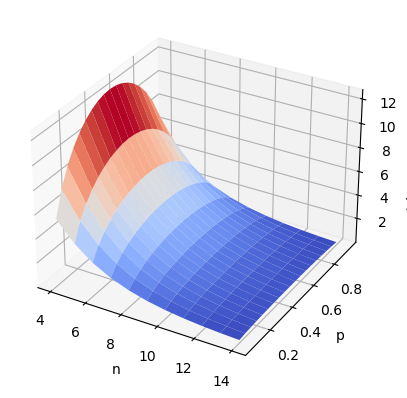

In [4]:
from matplotlib import cm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(np.log2(n_mesh), p_mesh, deviation_perc, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.set_xlabel('n')
ax.set_ylabel('p')
ax.set_zlabel('stdev in percent')


In [5]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Surface(
            z=deviation_perc,
            x=n_mesh,
            y=p_mesh
        )
    ]
)

fig.update_layout(
    title='Expected Deviation', 
    # autosize=False,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=90, t=90),
    scene=dict(
        xaxis=dict(dtick=np.log10(2),type='log'),
        xaxis_title="Number of samples",
        yaxis_title="True Probability",
        zaxis_title="Expected Deviation"
    )
)

array([12.5       ,  8.83883476,  6.25      ,  4.41941738,  3.125     ,
        2.20970869,  1.5625    ,  1.10485435,  0.78125   ,  0.55242717,
        0.390625  ])

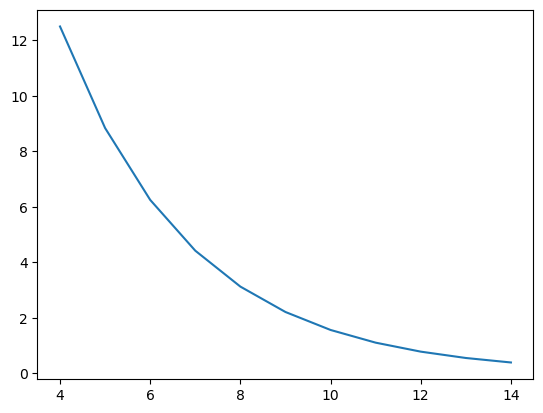

In [13]:
p = 0.5
plt.plot(np.log2(n),f_perc(n,p))
f_perc(n,p)

In [68]:
import pandas as pd

data = [["MNLI", "Natural Language Inference", 9815,83.91],
        ["QNLI", "Natural Language Inference", 5463,90.66],
        ["RTE", "Natural Language Inference", 277,65.7],
        ["WNLI", "Natural Language Inference", 71,56.34],
        ["MRPC", "Similarity Paraphrase", 408,84.07],
        ["QQP", "Similarity Paraphrase", 40430,90.71],
        ["STSB", "Similarity Paraphrase", 1500,88.64],
        ["CoLA", "Single Sentence Task", 1043,56.53],
        ["SST2", "Single Sentence Task", 872,92.32]]
df = pd.DataFrame(data,columns=["name","type","n","p"])
df["deviation_perc"] = f_perc(df["n"].to_numpy(),df["p"].to_numpy()/100)
df

,name,type,n,p,deviation_perc
0,MNLI,Natural Language Inference,9815,83.91,0.370885
1,QNLI,Natural Language Inference,5463,90.66,0.393700
2,RTE,Natural Language Inference,277,65.70,2.852265
3,WNLI,Natural Language Inference,71,56.34,5.886012
4,MRPC,Similarity Paraphrase,408,84.07,1.811750
5,QQP,Similarity Paraphrase,40430,90.71,0.144372
6,STSB,Similarity Paraphrase,1500,88.64,0.819329
7,CoLA,Single Sentence Task,1043,56.53,1.534943
8,SST2,Single Sentence Task,872,92.32,0.901717


SyntaxError: invalid syntax (1897578524.py, line 5)

In [7]:
d = {"test":2}
print(d)
e = {}
print({"test2":1} | e | d)
print(d.update({"a":"b"}))

{'test': 2}
{'test2': 1, 'test': 2}
None


In [3]:
from datasets import load_dataset
raw_datasets = load_dataset("glue", "cola")

In [ ]:
from torch.utils.data import DataLoader
DataLoader()

In [2]:
import torch
torch.tensor(0)

tensor(0)

In [4]:
interval = 50
step = 1
step % interval

1

# Get API data from WANBD

In [2]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("ricu/fantastic-umbrella")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    if "gen_07" not in run.tags:
        continue
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

In [26]:
import pandas as pd
# df = pd.read_csv("wandb_export_2023-11-23T20_39_10.208+01_00.csv")
df = pd.read_csv("wandb_export_2023-11-23T21_21_19.985+01_00.csv")
df


,Name,Runtime,Notes,Tags,ID,State,User,Group,Job Type,Created,...,best_spearmanr_step,eval_loss.min,eval_p_max,eval_p_var,f1,matthews_correlation,pearson,spearmanr,train_p_max,train_p_var
0,sweep_12a_00_modded/run_64,221,-,gen_12,z6zwx78n,finished,ricu,NaN,NaN,2023-10-19T15:28:29.000Z,...,NaN,NaN,NaN,NaN,0.898451,NaN,NaN,NaN,NaN,NaN
1,sweep_12a_00_modded/run_68,127,-,"gen_12, param_config_f",lptv9xjc,finished,ricu,NaN,NaN,2023-10-19T15:44:50.000Z,...,NaN,NaN,NaN,NaN,0.899830,NaN,NaN,NaN,NaN,NaN
2,sweep_12a_00_modded/run_31,256,-,gen_12,dyahlk80,finished,ricu,NaN,NaN,2023-10-19T12:52:15.000Z,...,NaN,NaN,NaN,NaN,0.894472,NaN,NaN,NaN,NaN,NaN
3,sweep_12a_00_modded/run_28,174,-,"gen_12, param_config_b",dw0syja0,finished,ricu,NaN,NaN,2023-10-19T12:42:07.000Z,...,NaN,NaN,NaN,NaN,0.898649,NaN,NaN,NaN,NaN,NaN
4,sweep_12a_00_modded/run_02,203,-,gen_12,j6zrh2jf,finished,ricu,NaN,NaN,2023-10-19T10:51:17.000Z,...,NaN,NaN,NaN,NaN,0.885417,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,sweep_12a_03_modded/run_11,276,-,gen_12,1qo3khmf,finished,ricu,NaN,NaN,2023-10-22T15:45:06.000Z,...,540.0,NaN,NaN,NaN,NaN,NaN,0.862923,0.861526,NaN,NaN
316,sweep_12a_03_modded/run_07,292,-,gen_12,zl66fou1,finished,ricu,NaN,NaN,2023-10-22T12:06:27.000Z,...,540.0,NaN,NaN,NaN,NaN,NaN,0.872282,0.867742,NaN,NaN
317,sweep_12a_03_modded/run_02,453,-,gen_12,zpt9ngqc,finished,ricu,NaN,NaN,2023-10-22T10:59:30.000Z,...,1530.0,NaN,NaN,NaN,NaN,NaN,0.870343,0.865121,NaN,NaN
318,sweep_12a_01_modded/run_72,206,-,gen_12,18i11ydg,finished,ricu,NaN,NaN,2023-10-20T14:31:49.000Z,...,NaN,NaN,NaN,NaN,NaN,0.591535,NaN,NaN,NaN,NaN


In [39]:
# df = df.loc[df["model_name_or_path"]=="bert-base-cased",]
# df = df.loc[df["training_size"]==1.0,]
df.loc[
    df["task_name"]=="stsb", #cola, rte, mrpc, stsb
    ].groupby(
        ["num_train_epochs","learning_rate","catch_dropout","insert_dropout"]
        ).agg(
            {"best_accuracy":"mean","best_f1":"mean","best_matthews_correlation":"mean","best_spearmanr":"mean"}
            ).sort_values(
                by=["best_spearmanr"],
                ascending=False
                )


best_accuracy  \
num_train_epochs learning_rate catch_dropout insert_dropout                  
50               0.000010      0.02          0.10                      NaN   
20               0.000010      0.02          0.10                      NaN   
50               0.000010      0.00          0.10                      NaN   
20               0.000010      0.00          0.10                      NaN   
                               0.02          0.15                      NaN   
                               0.00          0.15                      NaN   
50               0.000010      0.02          0.15                      NaN   
                               0.00          0.15                      NaN   
20               0.000005      0.02          0.10                      NaN   
                               0.00          0.10                      NaN   
                               0.02          0.15                      NaN   
50               0.000005      0.02          0.10                      NaN   
20               0.000005      0.00          0.15                      NaN   
50               0.000005      0.00          0.10                      NaN   
                               0.02          0.15                      NaN   
                               0.00          0.15                      NaN   

                                                             best_f1  \
num_train_epochs learning_rate catch_dropout insert_dropout            
50               0.000010      0.02          0.10                NaN   
20               0.000010      0.02          0.10                NaN   
50               0.000010      0.00          0.10                NaN   
20               0.000010      0.00          0.10                NaN   
                               0.02          0.15                NaN   
                               0.00          0.15                NaN   
50               0.000010      0.02          0.15                NaN   
                               0.00          0.15                NaN   
20               0.000005      0.02          0.10                NaN   
                               0.00          0.10                NaN   
                               0.02          0.15                NaN   
50               0.000005      0.02          0.10                NaN   
20               0.000005      0.00          0.15                NaN   
50               0.000005      0.00          0.10                NaN   
                               0.02          0.15                NaN   
                               0.00          0.15                NaN   

                                                             best_matthews_correlation  \
num_train_epochs learning_rate catch_dropout insert_dropout                              
50               0.000010      0.02          0.10                                  NaN   
20               0.000010      0.02          0.10                                  NaN   
50               0.000010      0.00          0.10                                  NaN   
20               0.000010      0.00          0.10                                  NaN   
                               0.02          0.15                                  NaN   
                               0.00          0.15                                  NaN   
50               0.000010      0.02          0.15                                  NaN   
                               0.00          0.15                                  NaN   
20               0.000005      0.02          0.10                                  NaN   
                               0.00          0.10                                  NaN   
                               0.02          0.15                                  NaN   
50               0.000005      0.02          0.10                                  NaN   
20               0.000005      0.00          0.15                                  NaN   
50       

In [16]:
df.training_size

4      1.0
12     1.0
26     1.0
28     1.0
31     1.0
32     1.0
33     1.0
45     1.0
52     1.0
61     1.0
67     1.0
76     1.0
78     1.0
84     1.0
95     1.0
110    1.0
114    1.0
118    1.0
121    1.0
131    1.0
140    1.0
159    1.0
184    1.0
187    1.0
192    1.0
202    1.0
207    1.0
211    1.0
250    1.0
260    1.0
263    1.0
266    1.0
276    1.0
277    1.0
280    1.0
284    1.0
Name: training_size, dtype: float64

In [125]:
X = 0.15429244
q = 0.01
round(X / q) * q

0.15

# Visualizing intuition

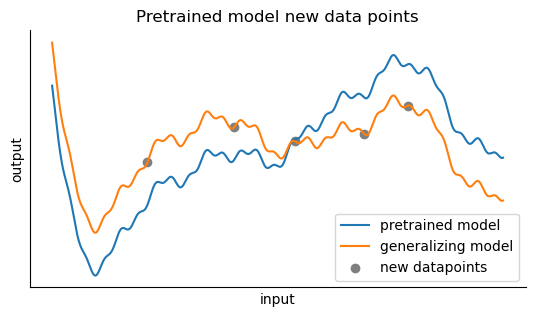

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange

fig,ax = plt.subplots(1)
ax.set_aspect(0.33)

x = np.linspace(-3.1,2.1,10001)
def polynomial(coefficients, x):
    y = np.zeros_like(x)
    for degree, coeff in enumerate(coefficients):
        y+= coeff * x ** degree
    return y
coefficients = np.array([12,28,11,-14,-8,2,1])
poly = lambda x: polynomial(coefficients/10,x)
noise = lambda x: 1/2 * np.sin(x*9)*np.sin(x*3) + 1/8* np.sin(32*x) 
f_PT = lambda x: poly(x) + noise(x)

y_PT = f_PT(x)
ax.plot(x,y_PT,label="pretrained model")


def diff_function(x):
    y = 1/(1+np.exp(3*x+1))
    y = 3*(y-0.5)
    return y
y_diff = diff_function(x)
f_FT = lambda x: f_PT(x) + diff_function(x)
y_FT = f_FT(x)

ax.plot(x,y_FT,label="generalizing model")


x_samples = np.array([-2, -1, -0.3, 0.5,1])
y_samples = f_FT(x_samples)
ax.scatter(x_samples,y_samples,label="new datapoints",c="tab:gray")

y_diff = y_samples-f_PT(x_samples)
# for x,y,dx,dy in zip(
#     x_samples,
#     f_PT(x_samples),
#     np.zeros_like(x_samples),
#     diff
#     ):

#     ax.arrow(x,y,dx,dy*0.9,head_width=0.1,length_includes_head=True,fc='k', ec='k')



# ax.plot(x,y_overfit,label="overfitting model")

ax.legend()

ax.set_xlabel('input')
ax.set_ylabel('output')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim([-4.5,4.5])


# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.set_title("Pretrained model new data points")
fig.savefig("img/fumbrella_mechanism_generalizing_model.pdf")

In [86]:
x_samples

array([-2. , -1. , -0.3,  0.5,  1. ])

[-2.   -1.   -0.3   0.5   1.   -2.5  -1.5  -0.65  0.1   0.75  1.5 ]
[ 1.47992145  1.14239123 -0.07493756 -1.27242546 -1.44604137 -3.64567234
 -0.62254924 -0.12421585  1.60526657  3.3153424   1.36495076]
[-2.5  -2.   -1.5  -1.   -0.65 -0.3   0.1   0.5   0.75  1.    1.5 ]
[-3.64567234  1.47992145 -0.62254924  1.14239123 -0.12421585 -0.07493756
  1.60526657 -1.27242546  3.3153424  -1.44604137  1.36495076]


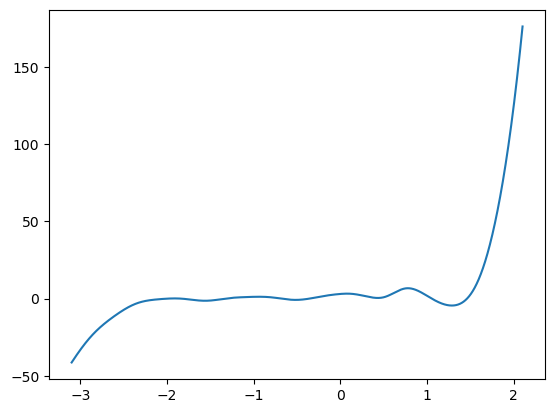

In [107]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange, CubicSpline


x_1 = np.array([-2.5,-1.5,-0.65,0.1,0.75,1.5])
y_1 = f_PT(x_1)

x_interp = np.concatenate([x_samples,x_1])
print(x_interp)
y_interp = np.concatenate([y_diff,y_1])
print(y_interp)
idx = x_interp.argsort()
x_interp = x_interp[idx]
print(x_interp)
y_interp = y_interp[idx]
print(y_interp)


# poly = lagrange(x_interp, y_interp)
# f_overfit = lambda x: Polynomial(poly.coef[::-1])(x)
cs = CubicSpline(x_interp,y_interp)
f_overfit = lambda x:  cs(x) + f_PT(x)
y_overfit = f_overfit(x)
plt.plot(x,y_overfit)

#### Zoomed in to illustrate FUMBRELLA behaviour

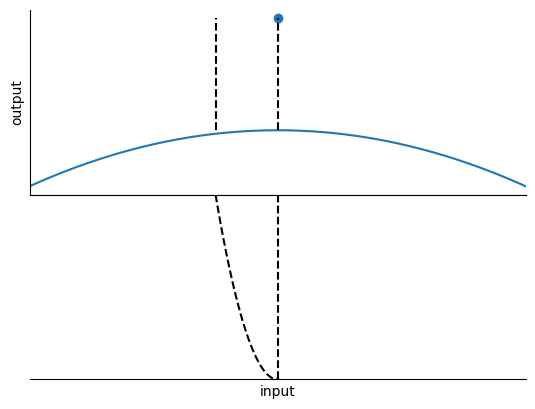

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange

fig, (ax0,ax1) = plt.subplots(2,1)
# ax.set_aspect(0.33)

interval = [-4,4]
x_no_dropout = np.array([0.0])
x_with_dropout = np.array([-1.0])
x = np.linspace(interval[0],interval[1],10001)
y_gap = 0.1

def polynomial(coefficients, x):
    y = np.zeros_like(x)
    for degree, coeff in enumerate(coefficients):
        y+= coeff * x ** degree
    return y
coefficients = np.array([0,0,-1/32])
poly = lambda x: polynomial(coefficients,x)
f_PT = lambda x: poly(x)

# TOP AXIS
y_PT = f_PT(x)
ax0.plot(x,y_PT,label="pretrained model")
y_no_dropout_pretrained = f_PT(x_no_dropout)
y_no_dropout_finetuned = f_PT(x_no_dropout)+1
ax0.scatter(
    x_no_dropout,
    y_no_dropout_finetuned,
    label="new datapoint"
    )

ax0.vlines(
    x=x_no_dropout,
    ymin=y_no_dropout_pretrained,
    ymax=y_no_dropout_finetuned,
    colors="k",
    linestyles="dashed"
    )

ax0.vlines(
    x=x_with_dropout,
    ymin=y_no_dropout_pretrained,
    ymax=y_no_dropout_finetuned,
    colors="k",
    linestyles="dashed"
    )

ax.annotate('input representation', xy=(1,0), xytext=(5, 1), ha='left', va='top',
            xycoords='axes fraction', textcoords='offset points')
ax0.set_ylabel('output')
ax0.set_yticklabels([])
ax0.set_xticklabels([])
ax0.set_xticks([])
ax0.set_yticks([])
ax0.spines.right.set_visible(False)
ax0.spines.top.set_visible(False)
ax0.set_xlim(interval)
# ax0.set_ylim([y_no_dropout_pretrained.min()-y_gap,y_no_dropout_finetuned.max()])



# BOTTOM AXIS
l = ax1.vlines(x=x_no_dropout,ymin=0,ymax=1,colors="k",linestyles="dashed")
# l.set_dashes

x_temp = np.linspace(x_with_dropout,x_no_dropout,101)
y_temp = x_temp**2
plt.plot(x_temp,y_temp,c="k",linestyle="dashed")

ax1.set_xlabel('input')
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines.left.set_visible(False)
ax1.spines.right.set_visible(False)
ax1.set_ylim([0,1])
ax1.set_xlim(interval)
# ax1.spines.top.set_visible(False)



fig.subplots_adjust(hspace=0)
# fig.tight_layout()

axs

In [15]:
from scipy.special import softmax
import math 

l = [2,0,0]
p = softmax(l)
print(p)


[0.78698604 0.10650698 0.10650698]


In [19]:
one_vs_rest_odds = p[0]/(1-p[0])
print(one_vs_rest_odds)

3.694528049465323


In [1]:
steps_per_epoch = 60
eval_steps = 32

completed_steps =  60
completed_steps_last_eval_cycle = 28

remaining_steps = completed_steps % eval_steps
remaining_steps


28